In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np

import sys; sys.path.insert(0, '..')
from ml.visualizations import *
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#import sys; sys.path.insert(0, '..') # allows for imports from directory above
#from ml.visualizations import *


## Load dataset

In [12]:
train = pd.read_csv('/Users/adam/phd/projects/certificates/dataset/train.csv', index_col='index')
target_variable = 'sec_level_cat'
y_train = train[target_variable]
x_train = train.drop(columns=target_variable)

## Train classifier

In [13]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate accuracy, precision and recall

In [14]:
# WARNING: Realize that when using NN or something where data is scaled to (0,1), it must be fit via pipe on training set and only transofmred on validation set!
# Pipeline should handle this well, as it applies fit on training data and transform on test data (which is the specific fold).

# Will raise some warnings because of dividing by 0 during precision count. Still, it acts correctly (taking 0).
score = cross_validate(rf, x_train, y_train, scoring=['accuracy', 'recall_macro', 'precision_macro'], n_jobs=8, cv=10)
acc, precision, recall = score['test_accuracy'], score['test_precision_macro'], score['test_recall_macro']
print(f'Validation accuracy: {np.mean(acc):.2f} +/- {np.std(acc):.2f}')
print(f'Validation precision: {np.mean(precision):.2f} +/- {np.std(precision):.2f}')
print(f'Validation recall: {np.mean(recall):.2f} +/- {np.std(recall):.2f}')

/Users/adam/.pyenv/versions/3.6.10/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Validation accuracy: 0.63 +/- 0.02
Validation precision: 0.50 +/- 0.03
Validation recall: 0.47 +/- 0.04


## Plot feature importances (on a *train* dataset)

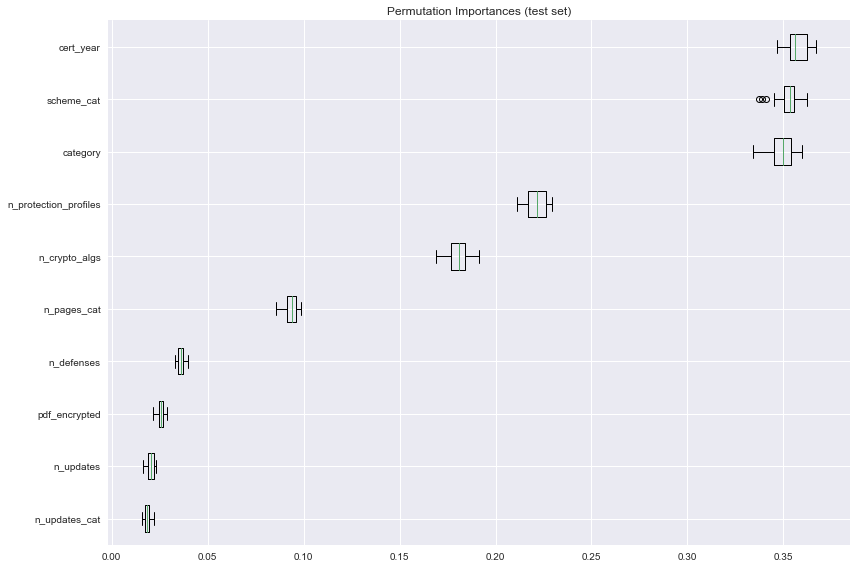

In [15]:
plot_feature_importances(rf, x_train, y_train)

## Plot confusion matrix

/Users/adam/.pyenv/versions/3.6.10/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/adam/.pyenv/versions/3.6.10/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
../ml/visualizations.py:58: RuntimeWarning: invalid value encountered in true_divide
  


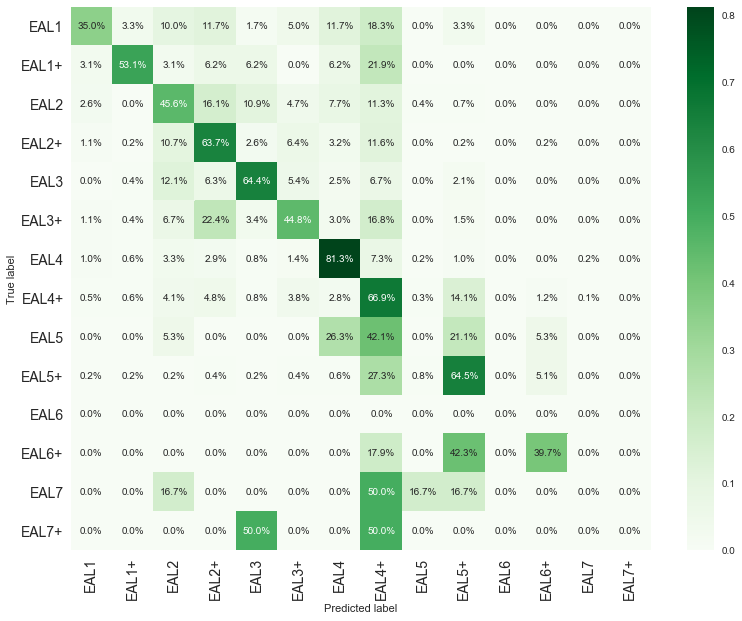

In [16]:
sec_level_dict = {'EAL1': 0, 'EAL1+': 1, 'EAL2': 2, 'EAL2+': 3, 'EAL3': 4, 'EAL3+': 5, 'EAL4': 6, 'EAL4+': 7, 'EAL5': 8, 'EAL5+': 9, 'EAL6': 10, 'EAL6+': 11, 'EAL7': 12, 'EAL7+': 13}
cross_validate_plot_cm(rf, x_train, y_train, sec_level_dict, filepath='test.png')
